# Correlating neutrino data from different experiments

In [1]:
import pyvo as vo
import matplotlib.pyplot as plt
import numpy as np

#retrieve the  full Antares test dataset
service_km3net = vo.dal.TAPService("http://vo.km3net.de/__system__/tap/run/tap")
dataset_antares = service_km3net.search("SELECT * FROM ant20_01.main")
# retrieve the full icecube dataset
service_icecube = vo.dal.TAPService("https://dc.zah.uni-heidelberg.de/__system__/tap/run/tap")
dataset_icecube = service_icecube.search("SELECT * FROM icecube.nucand")

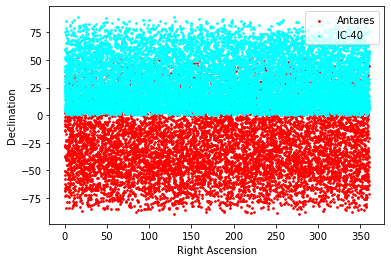

In [2]:
# superimpose the RA vs Declination scatter plots for both Antares & IC data
ra_antares = []
decl_antares = []
i=0
while i < len(dataset_antares): 
    for row in dataset_antares:
        ra_antares.append(dataset_antares['ra', i ])
        decl_antares.append(dataset_antares['decl', i ])
        i=i+1

ra_icecube = []
decl_icecube = []
i=0
while i < len(dataset_icecube): 
    for row in dataset_icecube:
        ra_icecube.append(dataset_icecube['nualpha', i ])
        decl_icecube.append(dataset_icecube['nudelta', i ])
        i=i+1

plt.scatter( ra_antares , decl_antares , s=3 , label="Antares" , c="red" )
plt.scatter( ra_icecube , decl_icecube , s=3 , label="IC-40" , c="cyan" )
plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.legend()
plt.show()

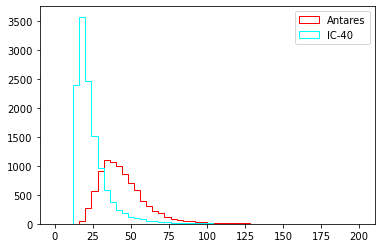

In [3]:
# superimpose the distributions of the number of hits for both datasets
nhits_antares = []
i=0
while i < len(dataset_antares): 
    for row in dataset_antares:
        nhits = dataset_antares['nhit', i ]
        i=i+1
        nhits_antares.append(nhits)

nhits_icecube = []
i=0
while i < len(dataset_icecube): 
    for row in dataset_icecube:
        nhits = dataset_icecube['nch', i ]
        i=i+1
        nhits_icecube.append(nhits)

plt.hist( nhits_antares , bins=50 , range=[0,200] , label = "Antares" , fill=False , color = "red" , histtype = 'step' )
plt.hist( nhits_icecube , bins=50 , range=[0,200] , label = "IC-40" , fill=False , color = "cyan" , histtype = 'step' )
plt.legend()
plt.show()